In [221]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import tree
import pandas as pd 
import numpy as np 
import sklearn
import warnings 
warnings.filterwarnings('ignore')

In [222]:
# load dataset 
data = pd.read_csv('Company_Data.csv')

In [223]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [224]:
# no null values present 
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [225]:
average_sales = data.Sales.values.mean()
print(f'Average Sales : {average_sales}')
# if 'sales' < average_sales -> 'Low' sales 
# else 'sales' >= average_sales -> 'High'
data['Sales'] = data.Sales.apply(lambda x:'Low' if x < data.Sales.values.mean() else 'High')

Average Sales : 7.496325000000001


In [226]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No


In [227]:
# 4 categorical columns 
# 7 numerical columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sales        400 non-null    object
 1   CompPrice    400 non-null    int64 
 2   Income       400 non-null    int64 
 3   Advertising  400 non-null    int64 
 4   Population   400 non-null    int64 
 5   Price        400 non-null    int64 
 6   ShelveLoc    400 non-null    object
 7   Age          400 non-null    int64 
 8   Education    400 non-null    int64 
 9   Urban        400 non-null    object
 10  US           400 non-null    object
dtypes: int64(7), object(4)
memory usage: 34.5+ KB


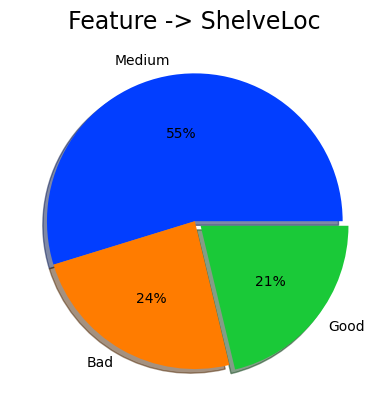

In [228]:
# ShelveLoc data
ax = data.ShelveLoc.value_counts().plot(kind='pie',explode=[0,0,0.05],
                                     colors=sns.color_palette('bright'),
                                     autopct='%0.0f%%',shadow=True)
ax.set_ylabel('')
plt.title('Feature -> ShelveLoc',
          fontsize=17)
plt.show()

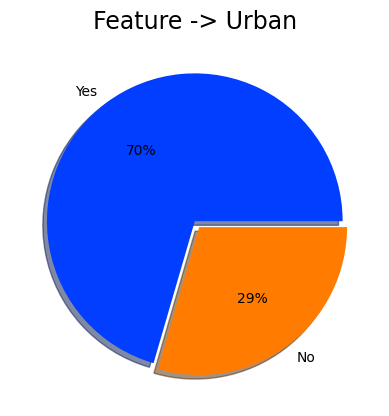

In [229]:
# urban data
ax = data.Urban.value_counts().plot(kind='pie',explode=[0,0.05],
                                 colors=sns.color_palette('bright'),
                                 autopct='%0.0f%%',shadow=True)
ax.set_ylabel('')
plt.title('Feature -> Urban',
          fontsize=17)
plt.show()

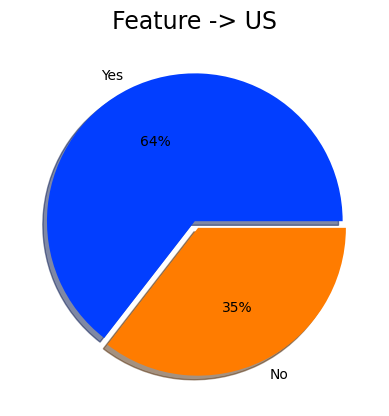

In [230]:
# US data
ax = data.US.value_counts().plot(kind='pie',explode=[0,0.05],
                                 colors=sns.color_palette('bright'),
                                 autopct='%0.0f%%',shadow=True)
ax.set_ylabel('')
plt.title('Feature -> US',
          fontsize=17)
plt.show()

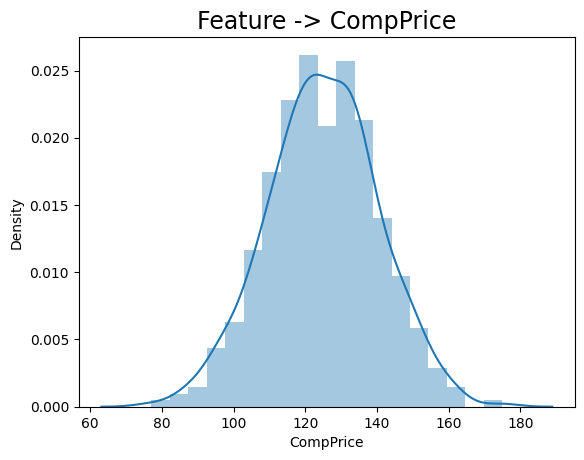

In [231]:
# CompPrice data
sns.distplot(data.CompPrice)
plt.title('Feature -> CompPrice',
          fontsize=17)
plt.show()

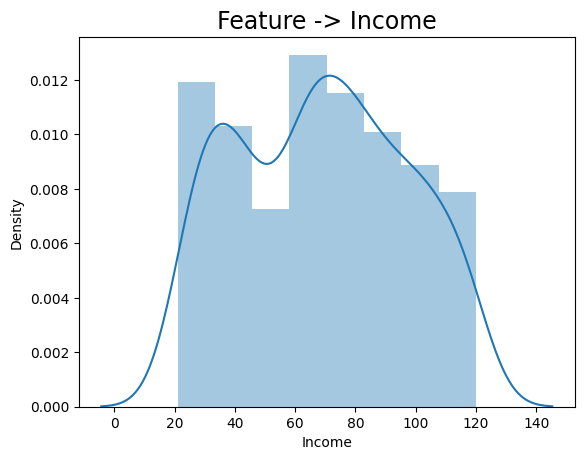

In [232]:
# Income data
sns.distplot(data.Income)
plt.title('Feature -> Income',
          fontsize=17)
plt.show()

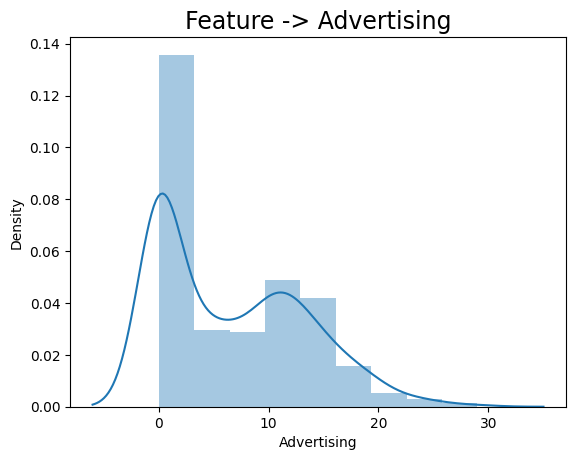

In [233]:
# Advertising data
sns.distplot(data.Advertising)
plt.title('Feature -> Advertising',
          fontsize=17)
plt.show()

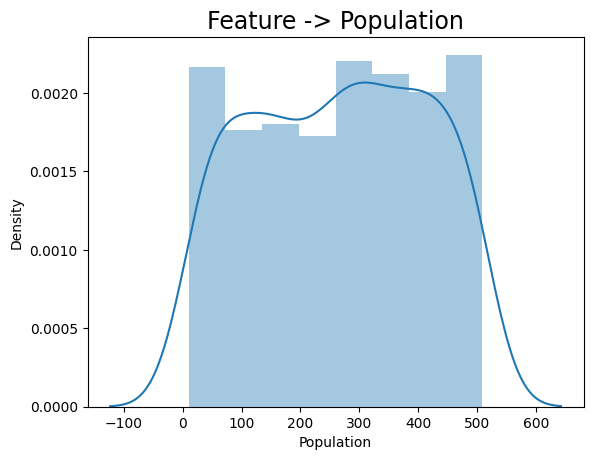

In [234]:
# Population data
sns.distplot(data.Population)
plt.title('Feature -> Population',
          fontsize=17)
plt.show()

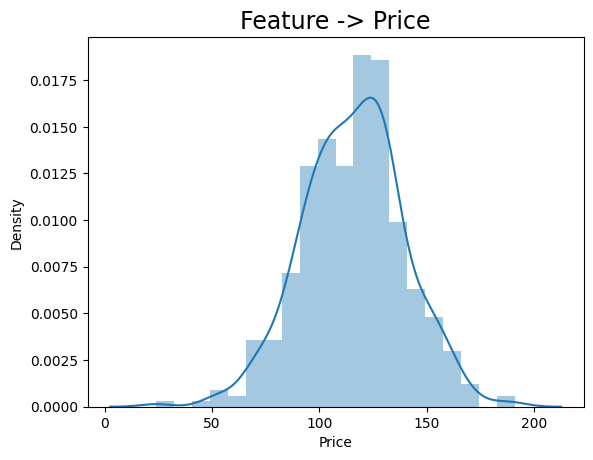

In [235]:
# Price data
sns.distplot(data.Price)
plt.title('Feature -> Price',
          fontsize=17)
plt.show()

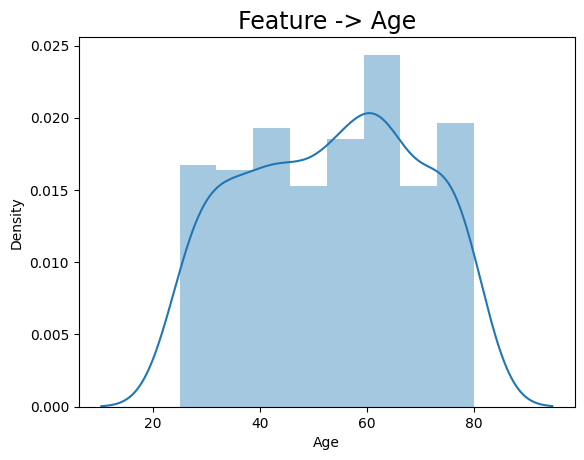

In [236]:
# Age data
sns.distplot(data.Age)
plt.title('Feature -> Age',
          fontsize=17)
plt.show()

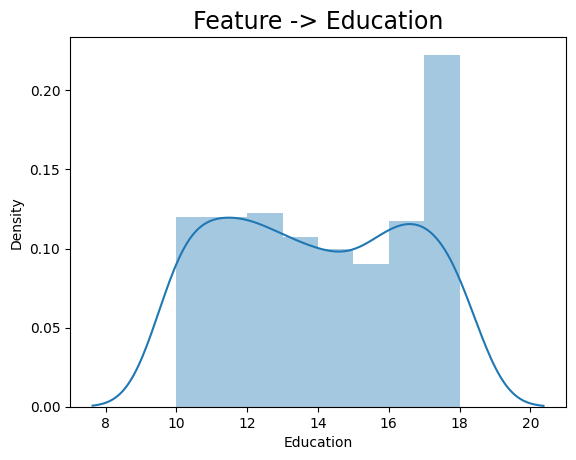

In [237]:
# Education data
sns.distplot(data.Education)
plt.title('Feature -> Education',
          fontsize=17)
plt.show()

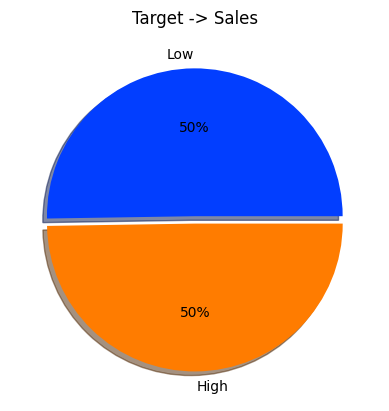

In [238]:
# target data is balanced 
# so accuracy can be used for evaluation 
# Sales data
ax = data.Sales.value_counts().plot(kind='pie',explode=[0,0.05],
                           colors=sns.color_palette('bright'),
                           autopct='%0.0f%%',shadow=True)
ax.set_ylabel('')
plt.title('Target -> Sales')
plt.show()

In [239]:
# perform encoding on categorical columns 
for col, dtype in tuple(zip(data.dtypes.index,data.dtypes.values)):
    if dtype == 'object':
        enc = LabelEncoder ()
        data[col] = enc.fit_transform(data[col])
        print(f'{col} -> {dict(zip(np.arange(enc.classes_.size),enc.classes_))}')        

Sales -> {0: 'High', 1: 'Low'}
ShelveLoc -> {0: 'Bad', 1: 'Good', 2: 'Medium'}
Urban -> {0: 'No', 1: 'Yes'}
US -> {0: 'No', 1: 'Yes'}


In [240]:
# transformed data
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0


In [241]:
# feature data
X = data.drop('Sales',axis=1)
# target data 
Y = data[['Sales']]

In [242]:
# split data for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,
                                                    random_state=42)

In [243]:
# brute force approach for 
# hyperparamter tunning 
clf = DecisionTreeClassifier(random_state=42)
param_grid = [{'criterion':["gini", "entropy", "log_loss"],
               'max_depth':[3,4,5,6,7]}]
grid = GridSearchCV(clf,param_grid,verbose=10)
grid.fit(X_train,y_train.values.ravel())

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START criterion=gini, max_depth=3................................
[CV 1/5; 1/15] END .criterion=gini, max_depth=3;, score=0.609 total time=   0.0s
[CV 2/5; 1/15] START criterion=gini, max_depth=3................................
[CV 2/5; 1/15] END .criterion=gini, max_depth=3;, score=0.641 total time=   0.0s
[CV 3/5; 1/15] START criterion=gini, max_depth=3................................
[CV 3/5; 1/15] END .criterion=gini, max_depth=3;, score=0.625 total time=   0.0s
[CV 4/5; 1/15] START criterion=gini, max_depth=3................................
[CV 4/5; 1/15] END .criterion=gini, max_depth=3;, score=0.672 total time=   0.0s
[CV 5/5; 1/15] START criterion=gini, max_depth=3................................
[CV 5/5; 1/15] END .criterion=gini, max_depth=3;, score=0.609 total time=   0.0s
[CV 1/5; 2/15] START criterion=gini, max_depth=4................................
[CV 1/5; 2/15] END .criterion=gini, max_depth=4;

[CV 3/5; 12/15] END criterion=log_loss, max_depth=4;, score=0.688 total time=   0.0s
[CV 4/5; 12/15] START criterion=log_loss, max_depth=4...........................
[CV 4/5; 12/15] END criterion=log_loss, max_depth=4;, score=0.688 total time=   0.0s
[CV 5/5; 12/15] START criterion=log_loss, max_depth=4...........................
[CV 5/5; 12/15] END criterion=log_loss, max_depth=4;, score=0.641 total time=   0.0s
[CV 1/5; 13/15] START criterion=log_loss, max_depth=5...........................
[CV 1/5; 13/15] END criterion=log_loss, max_depth=5;, score=0.703 total time=   0.0s
[CV 2/5; 13/15] START criterion=log_loss, max_depth=5...........................
[CV 2/5; 13/15] END criterion=log_loss, max_depth=5;, score=0.656 total time=   0.0s
[CV 3/5; 13/15] START criterion=log_loss, max_depth=5...........................
[CV 3/5; 13/15] END criterion=log_loss, max_depth=5;, score=0.688 total time=   0.0s
[CV 4/5; 13/15] START criterion=log_loss, max_depth=5...........................
[CV 

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [3, 4, 5, 6, 7]}],
             verbose=10)

In [244]:
print(f'Decision Tree give best training score of {round(grid.best_score_*100,2)}% with\ncriterion : {grid.best_params_["criterion"]}\nmax_depth : {grid.best_params_["max_depth"]}')

Decision Tree give best training score of 70.94% with
criterion : entropy
max_depth : 7


In [245]:
# Decision Tree Model Prunning
model = DecisionTreeClassifier(criterion='entropy',
                               max_depth=7)
# get effective ccp_alphas for our DTC model
c_ = model.cost_complexity_pruning_path(X_train,y_train)
# remove last cc_values bcoz it gives trivial tree
# ie only one node 
c = {}
c['ccp_alphas'] = c_['ccp_alphas'][:-1]
c['impurities'] = c_['impurities'][:-1]

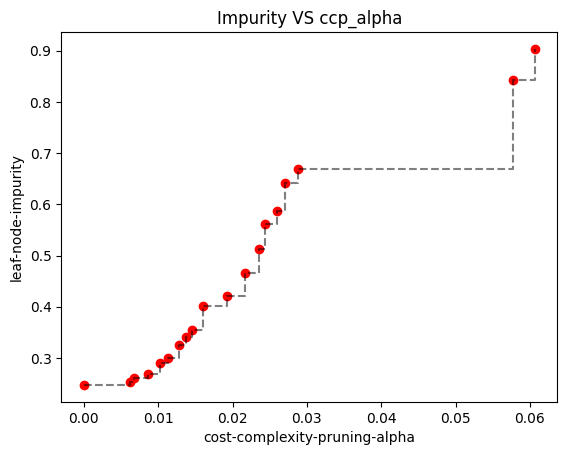

In [246]:
# impurity vs ccp_alpha_plot
plt.plot(c['ccp_alphas'],c['impurities'],
         linestyle='dashed',color='black',
         alpha=0.5,drawstyle='steps-post')
plt.scatter(c['ccp_alphas'],c['impurities'],
            color='red')
plt.title('Impurity VS ccp_alpha')
plt.xlabel('cost-complexity-pruning-alpha')
plt.ylabel('leaf-node-impurity')
plt.show()

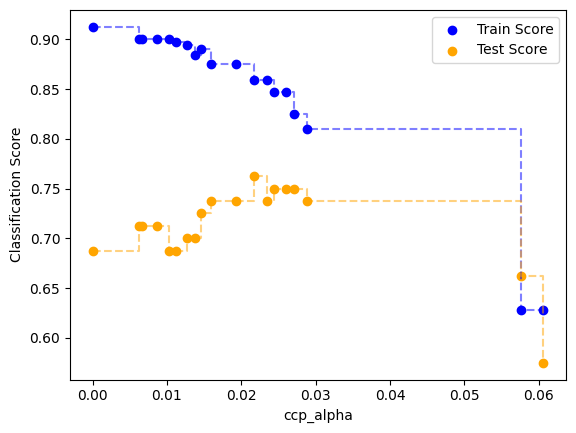

In [247]:
trainAcc = []
testAcc = []
numOfNode = [] 
depthOfTree = []
for alpha in c['ccp_alphas']:
    tempModel = DecisionTreeClassifier(criterion='entropy',
                                       max_depth=7,ccp_alpha=alpha)
    tempModel.fit(X_train,y_train)
    # predictions on training data
    trainPred = tempModel.predict(X_train)
    # predictons on testing data
    testPred = tempModel.predict(X_test)
    # training accuracy
    trainAcc.append(accuracy_score(y_train,trainPred.ravel()))
    # testing accuracy
    testAcc.append(accuracy_score(y_test,testPred.ravel()))
    numOfNode.append(tempModel.get_n_leaves())
    depthOfTree.append(tempModel.max_depth)
plt.plot(c['ccp_alphas'],trainAcc,
         color='blue',linestyle='dashed',
         alpha=0.5,drawstyle='steps-post')
plt.scatter(c['ccp_alphas'],trainAcc,
            color='blue',label='Train Score')
plt.plot(c['ccp_alphas'],testAcc,
         color='orange',linestyle='dashed',
         alpha=0.5,drawstyle='steps-post')
plt.scatter(c['ccp_alphas'],testAcc,
            color='orange',label='Test Score')
plt.ylabel('Classification Score')
plt.xlabel('ccp_alpha')
plt.legend()
plt.show()

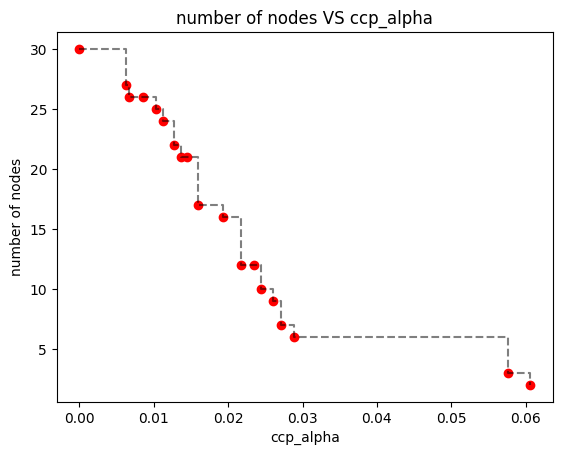

In [248]:
plt.plot(c['ccp_alphas'],numOfNode,
         color='black',linestyle='dashed',
         alpha=0.5,drawstyle='steps-post')
plt.scatter(c['ccp_alphas'],numOfNode,
            color='red')
plt.xlabel('ccp_alpha')
plt.ylabel('number of nodes')
plt.title('number of nodes VS ccp_alpha')
plt.show()

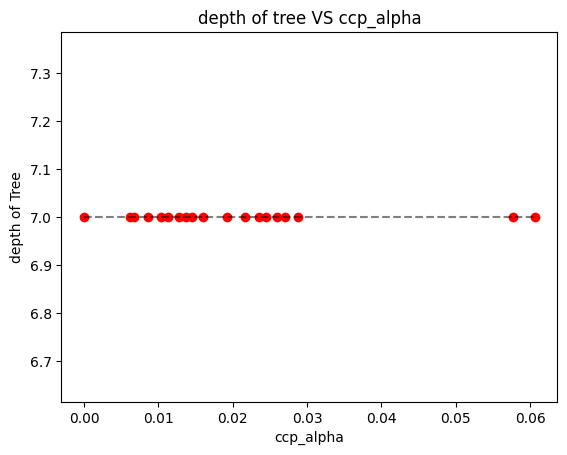

In [249]:
plt.plot(c['ccp_alphas'],depthOfTree,
         color='black',linestyle='dashed',
         alpha=0.5,drawstyle='steps-post')
plt.scatter(c['ccp_alphas'],depthOfTree,
            color='red')
plt.xlabel('ccp_alpha')
plt.ylabel('depth of Tree')
plt.title('depth of tree VS ccp_alpha')
plt.show()

In [250]:
print(f'Testing accuracy is highet at ccp_alpha of {0.01629064}')

Testing accuracy is highet at ccp_alpha of 0.01629064


In [251]:
# final optimized model after prunning 
# criterion -> entropy 
# max_depth -> 7
# ccp_alpha -> 0.02708782
finalClf = DecisionTreeClassifier(criterion=grid.best_params_['criterion'],
                                  max_depth=grid.best_params_['max_depth'],
                                  ccp_alpha=0.01629064)

In [252]:
# training DT
finalClf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01629064, criterion='entropy', max_depth=7)

In [253]:
print(f'Train Accuracy of final model : {round(accuracy_score(y_train,finalClf.predict(X_train))*100,2)}')

Train Accuracy of final model : 88.12


In [254]:
print(f'Test Accuracy of final model : {round(accuracy_score(y_test,finalClf.predict(X_test))*100,2)}')

Test Accuracy of final model : 76.25


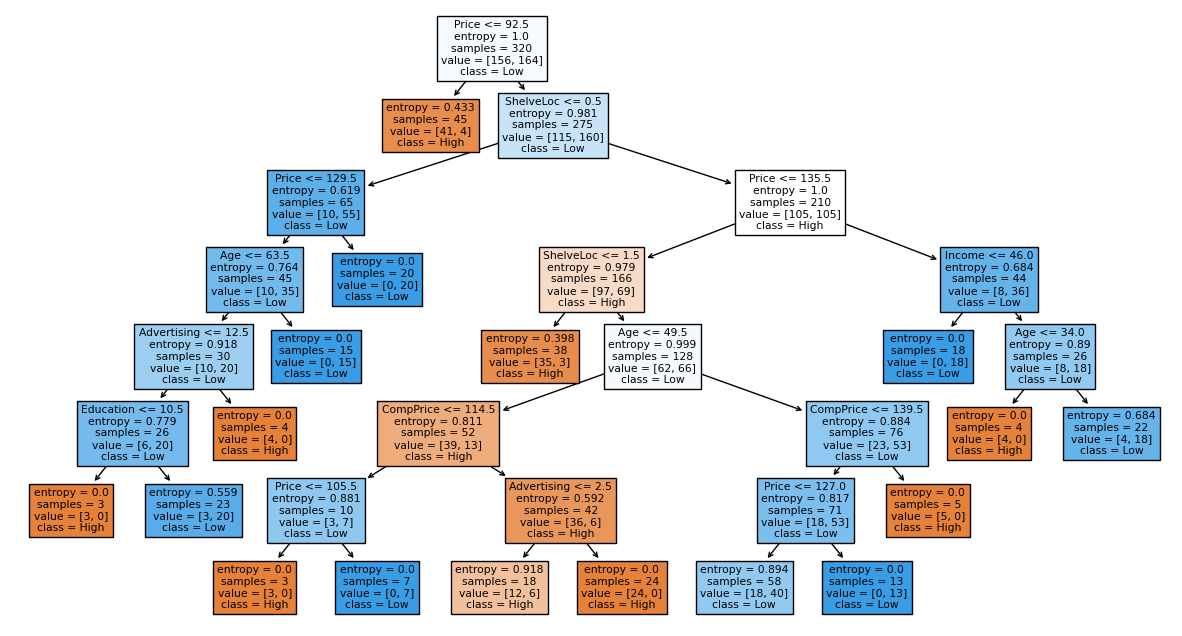

In [255]:
# visualize final Decision Tree 
plt.figure(figsize=(15,8))
tree.plot_tree(finalClf,
               feature_names=X.columns,
               class_names={0: 'High', 1: 'Low'},
               filled=True)
plt.show()

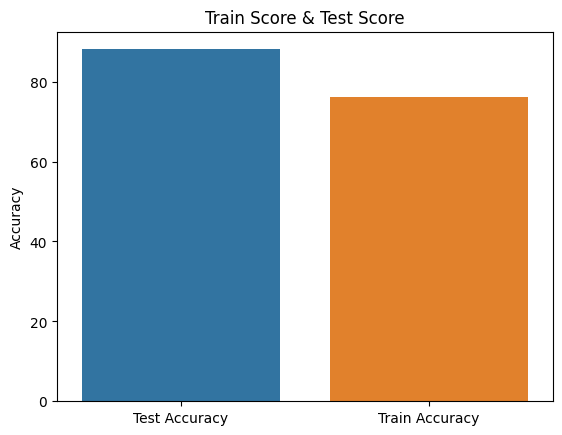

In [256]:
sns.barplot(x=['Test Accuracy','Train Accuracy'],
            y=[round(accuracy_score(y_train,finalClf.predict(X_train))*100,2),
              round(accuracy_score(y_test,finalClf.predict(X_test))*100,2)])
plt.ylabel('Accuracy')
plt.title('Train Score & Test Score')
plt.show()

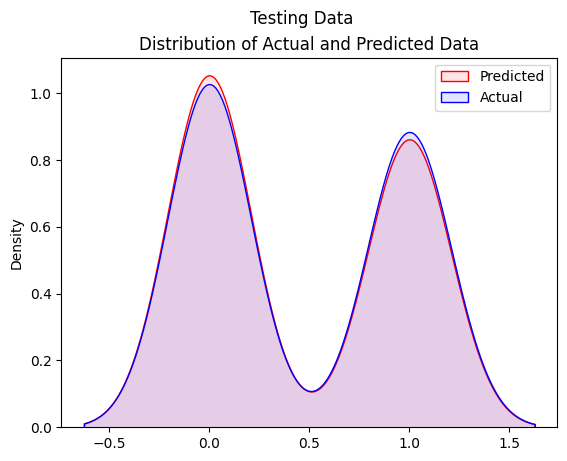

In [257]:
sns.distplot(finalClf.predict(X_test),hist=False,color='red',
                              kde_kws={'shade':True,'alpha':0.1})
sns.distplot(y_test,hist=False,color='blue',
             kde_kws={'shade':True,'alpha':0.1})
plt.legend(['Predicted','Actual'],loc='upper right')
plt.title('Distribution of Actual and Predicted Data')
plt.suptitle('Testing Data')
plt.show()

In [258]:
# look for f1 score 
print(classification_report(y_test,finalClf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        43
           1       0.75      0.73      0.74        37

    accuracy                           0.76        80
   macro avg       0.76      0.76      0.76        80
weighted avg       0.76      0.76      0.76        80



In [259]:
# prediction on test data
testResult = X_test.copy(deep=True)
testResult['Sales'] = finalClf.predict(X_test)
testResult.Sales.replace({0: 'High', 1: 'Low'},inplace=True)
testResult

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
209,98,21,11,326,90,0,76,11,0,1,High
280,121,86,10,496,145,0,51,10,1,1,Low
33,114,38,13,317,128,1,50,16,1,1,High
210,125,41,2,357,123,0,47,14,0,1,Low
93,145,30,0,67,104,2,55,17,1,0,High
...,...,...,...,...,...,...,...,...,...,...,...
246,120,56,20,266,90,0,78,18,1,1,High
227,113,64,10,68,101,2,57,16,1,1,Low
369,135,100,22,463,122,2,36,14,1,1,High
176,138,107,9,480,154,2,47,11,0,1,Low


## Decision Tree Classifier on Company dataset with training accuracy of 87.5% , testing accuracy of 73.75% and 74%